In [42]:
import pandas as pd
import numpy as np
from pydataset import data
import viz
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1.  Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2.  Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

- assuming X and y are already defined
    - model = LinearRegression().fit(X, y)
    - predictions = model.predict(X)
    - Modify and add to the code above as necessary for it to work with the tips dataset.

In [3]:
#Establish a baseline
df['yhat_baseline'] = df.tip.mean()

In [5]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279


In [6]:
# Build a Simple Model
# generate parameters, i.e. create model
tip_model = LinearRegression().fit(df[['total_bill']], df.tip)

# compute predictions and add to original dataframe
df['yhat'] = tip_model.predict(df[['total_bill']])

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835


3.  Plot the residuals for the linear regression model that you made.

In [9]:
df['residuals'] = df.tip - df.yhat

In [10]:
df['baseline_residuals'] = df.tip - df.yhat_baseline

In [11]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721


<AxesSubplot:ylabel='Frequency'>

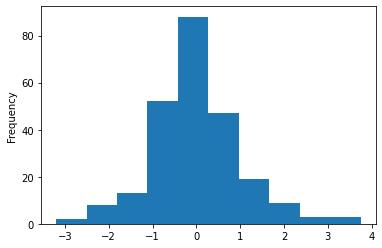

In [12]:
df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

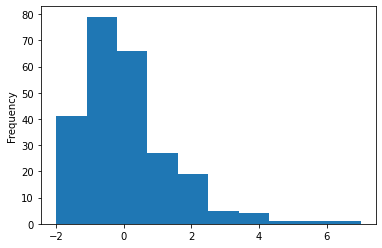

In [13]:
df.baseline_residuals.plot.hist()

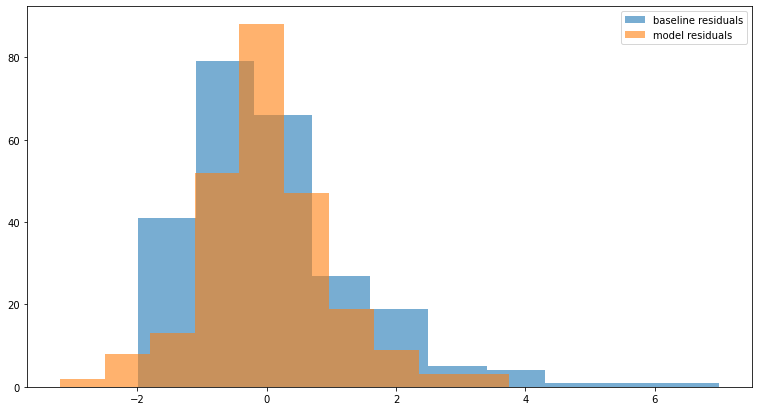

In [14]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

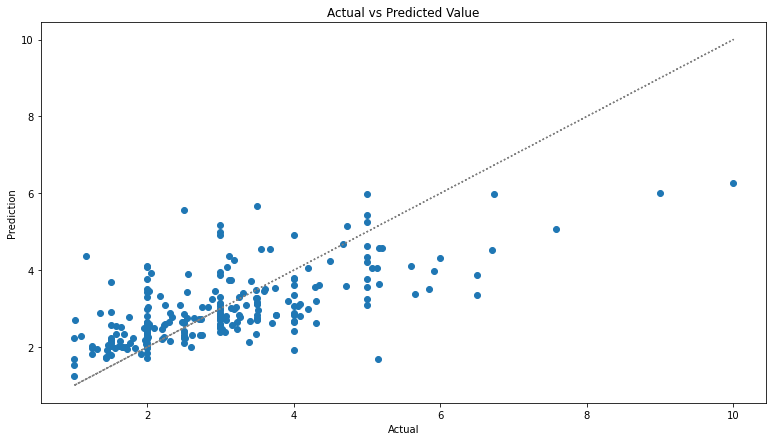

In [15]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.tip, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(df.tip, df.tip, ls=':', c='gray')

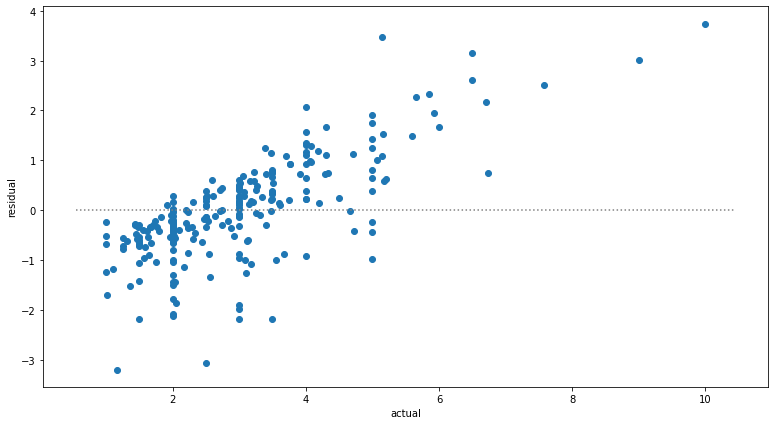

In [17]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.tip, df.residuals)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

4.  Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


In [32]:
# Calculate the sum of squared errors
df['residual^2'] = df.residuals ** 2

df['residual_baseline^2'] = df.baseline_residuals ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,baseline_residuals,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724


In [33]:
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


In [34]:
# Calculate explained sum of squares ESS
ESS = sum((df.yhat - df.tip.mean())**2)
ESS

212.42373319840416

In [36]:
# Calculate total sum of squares 
tss = ((df.tip - df.tip.mean())**2).sum()
tss

465.2124770491804

In [38]:
ESS / tss

0.456616586351676

In [40]:
# Calculate mean squared error MSE
mse = sse / n
mse

1.036019442011377

In [43]:
# Calculate root mean squared error RMSE
rmse = math.sqrt(mse)
rmse

1.0178504025697377

In [44]:
ess = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

print('ess: %.4f' % ess)

ess / tss

ess: 0.0000


0.0

5.  Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6.  Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7.  What is the amount of variance explained in your model?

8.  Is your model better than the baseline model?

In [ ]:
# just use rmse score

9.  Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

10.  Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.